[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ClimateMatchAcademy/course-content/blob/main/tutorials/W1D1_ClimateSystemOverview/instructor/W1D1_Tutorial9.ipynb)   <a href="https://kaggle.com/kernels/welcome?src=https://raw.githubusercontent.com/ClimateMatchAcademy/course-content/main/tutorials/W1D1_ClimateSystemOverview/instructor/W1D1_Tutorial9.ipynb" target="_blank"><img alt="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"/></a>

# **Tutorial 9: Masking with Multiple Conditions**

**Week 1, Day 1, Climate System Overview**

**Content creators:** Sloane Garelick, Julia Kent

**Content reviewers:** Katrina Dobson, Younkap Nina Duplex, Danika Gupta, Maria Gonzalez, Will Gregory, Nahid Hasan, Sherry Mi, Beatriz Cosenza Muralles, Jenna Pearson, Agustina Pesce, Chi Zhang, Ohad Zivan

**Content editors:** Jenna Pearson, Chi Zhang, Ohad Zivan

**Production editors:** Wesley Banfield, Jenna Pearson, Chi Zhang, Ohad Zivan

**Our 2023 Sponsors:** NASA TOPS and Google deepmind

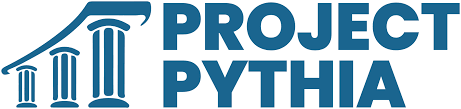 | 
-
Pythia credit: Rose, B. E. J., Kent, J., Tyle, K., Clyne, J., Banihirwe, A., Camron, D., May, R., Grover, M., Ford, R. R., Paul, K., Morley, J., Eroglu, O., Kailyn, L., & Zacharias, A. (2023). Pythia Foundations (Version v2023.05.01) https://zenodo.org/record/8065851



# **Tutorial Objectives**

In the previous tutorial, you masked data using one condition (areas where SST was above 0ºC). You can also mask data using multiple conditions. For example, you can mask data from regions outside a certain spatial area by providing constraints on the latitude and longitude. 

In this tutorial, you will practice masking data using multiple conditions in order to interpret SST in the tropical Pacific Ocean in the context of the El Niño Southern Oscillation (ENSO).

# **Setup**


In [ ]:
# imports
import numpy as np
import xarray as xr
from pythia_datasets import DATASETS
import pandas as pd
import matplotlib.pyplot as plt

##  Figure Settings


###  Figure Settings


In [ ]:
# @title Figure Settings
import ipywidgets as widgets       # interactive display
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/ClimateMatchAcademy/course-content/main/cma.mplstyle")

##  Video 1: Video Title


###  Video 1: Video Title


In [ ]:
# @title Video 1: Video Title
#Tech team will add code to format and display the video

# Section 1: Using `.where()` with multiple conditions

First, let's load the same data that we used in the previous tutorial (monthly SST data from CESM2):

In [ ]:
filepath = DATASETS.fetch('CESM2_sst_data.nc')
ds = xr.open_dataset(filepath)
ds

`.where()` allows us to mask using multiple conditions. To do this, we need to make sure each conditional expression is enclosed in `()`. To combine conditions, we use the `bit-wise and` (`&`) operator and/or the `bit-wise or` (`|`). Let's use `.where()` to isolate locations with temperature values **greater than 25 and less than 30**:

In [ ]:
# take the last time step as our data
sample = ds.tos.isel(time=-1)

# just keep data between 25-30 C
sample.where((sample > 25) & (sample < 30)).plot(size=6);

# **Section 2: Using `.where()` with a Custom Fill Value**

`.where()` can take a second argument, which, if supplied, defines a fill value for the masked region. Below we fill masked regions with a constant `0`:

In [ ]:
sample.where((sample > 25) & (sample < 30), 0).plot(size=6);

# **Section 3: Using `.where()` with Specific Coordinates**

We can use coordinates to apply a mask as well. For example, we can use a mask to assess tropical Pacific SST associated with the El Niño Southern Oscillation (ENSO). As we learned in the video, ENSO is a climate phenomena that originates in the tropical Pacific ocean but has global impacts on atmospheric circulation, temperature and precipitation. The two phases of ENSO are El Niño (warmer than average SSTs in the central and eastern tropical Pacific Ocean) and La Niña (cooler than average SSTs in the central and eastern tropical Pacific Ocean). The Niño 3.4 region is an area in the centeral and eastern Pacific Ocean that is often used for determining the phase of ENSO. Below, we will use the `latitude` and `longitude` coordinates to mask everywhere outside of the [Niño 3.4 region](https://www.ncdc.noaa.gov/teleconnections/enso/indicators/sst/). Note in our data that we are in degrees East, so the values we input for `longitude` will be shifted compared to the figure below.

![](https://www.ncdc.noaa.gov/monitoring-content/teleconnections/nino-regions.gif)



In [ ]:
# input the conditions for the latitude and longitude values we wish to preserve
sample.where(
    (sample.lat < 5) & (sample.lat > -5) & (sample.lon > 190) & (sample.lon < 240)
).plot(size=6);

Now let's look at a time series of the data from this masked region. Rather than specifying a certain time period, we can mask all areas outside of the Niño 3.4 region and then take the spatial mean to assess changes in Niño 3.4 SST over this time period.

In [ ]:
nino = ds.tos.where(
    (sample.lat < 5) & (sample.lat > -5) & (sample.lon > 190) & (sample.lon < 240)
)

nino_mean = ds.tos.mean(dim=['lat', 'lon'])
nino_mean

In [ ]:
nino_mean.plot()

## **Questions 3: Climate Connection**

1. What patterns (e.g. cycles, trends) do you observe in this SST time series for the Niño 3.4 region?
2. What do you think might be responsible for the patterns you observe? What about any trends?
3. Notice that we did not use a weighted mean. Do you think the results would be very different if we did weight the mean?

In [ ]:
# to_remove explanation

"""
1. The SST time series indicates an increase from 2000 to 2014 for the Niño 3.4 region. On top of this increase we see fluctuations seasonally and interannually (year-to year).
2. The seasonal variability could be related to seasonally varying insolation, overlying wind patterns, and precipitation, while the interannual variability could be tied to ENSO events.  The long-term trend of increasing SSTs could be attributed to human-induced global warming or decadal variability as our time series is quite short.
3. In the equatorial region, the grid cells are usually very similar in size. You could compute the weighted average and compare to be sure this is the case with our reanalysis product.

These questions are just to get you thinking....note from this time series alone we can not attribute processes to the observed SST.
""";

# **Summary**

- Similar to NumPy, arithmetic operations are vectorized over a DataArray
- Xarray provides aggregation methods like `sum()` and `mean()`, with the option to specify which dimension over which the operation will be done
- `groupby` enables the convenient split-apply-combine workflow
- The `.where()` method allows for filtering or replacing of data based on one or more provided conditions

# **Resources**

Code and data for this tutorial is based on existing content from [Project Pythia](https://foundations.projectpythia.org/core/xarray/computation-masking.html).